In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Steps : Extract date & month from Dateofjourney, hours and mins from deptime, hour min from arrivaltime.

### Extracting day and month from Date_of_Journey column

In [3]:
df['Journey_Day']=df['Date_of_Journey'].apply(lambda x: x.split('/')[0])

In [4]:
df['Journey_month']=df['Date_of_Journey'].apply(lambda x: x.split('/')[1])

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [6]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [7]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().mean()

Airline            0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
Journey_Day        0.0
Journey_month      0.0
dtype: float64

In [10]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_month'],
      dtype='object')

In [11]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day        object
Journey_month      object
dtype: object

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [13]:
#Now lets deal with departure time

In [14]:
#extract hours
df['Dep_Hour']=df['Dep_Time'].apply(lambda x: x.split(':')[0])

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,09
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,16


In [16]:
df['Dep_Min']=df['Dep_Time'].apply(lambda x: x.split(':')[1])

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,16,50


In [18]:
df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,16,50


In [19]:
df.Arrival_Time.value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
08:15 22 Apr      1
02:15 02 Apr      1
02:45 28 Jun      1
18:30 02 May      1
02:20 19 Apr      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [20]:
#extracting hours #dt.hour for extracting hour and dt.minute used for extracting minutes. Lamda also we can use but it can create issue.

df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

In [21]:
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [22]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,09,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,16,50,21,35


In [23]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,09,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,16,50,21,35


In [25]:
2

2

In [26]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,09,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,16,50,21,35


In [27]:
#now lets deal with duration..make separate column for hour and min..extract it from duration

In [28]:
duration=list(df['Duration'])

In [29]:
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + " 0m "
        else:
            duration[i]=' 0h ' + duration[i]            

In [30]:
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [31]:
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins

In [32]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,16,50,21,35,4,45


In [33]:
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,05,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,01,03,16,50,21,35,4,45


### Now lets handle categorical data

In [34]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [35]:
#perform one hot encoding on airline as its nominal category

In [36]:
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

In [37]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
df['Source'].value_counts()  #prform one hot encoding on Source

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

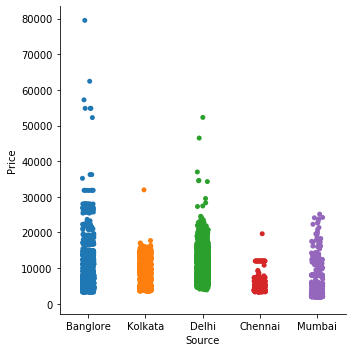

In [39]:
sns.catplot(x='Source',y='Price',data=df)

In [40]:
Source=df[['Source']]

In [41]:
Source=pd.get_dummies(Source,drop_first=True)

In [42]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [43]:
#now deal with destination

In [44]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,05,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,01,03,16,50,21,35,4,45


In [45]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)

In [46]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
#we can drop route as stops and route are same

In [48]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [49]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,05,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,06,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,05,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,01,03,16,50,21,35,4,45


In [50]:
#now lets deal wih total stops

In [51]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [52]:
df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True) #perform label encoding on ordinal stops data

In [53]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,05,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,06,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,05,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,01,03,16,50,21,35,4,45


In [54]:
df_final=pd.concat([df,Airline,Source,Destination],axis=1)

In [55]:
df_final.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,05,05,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,06,09,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,05,18,05,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,01,03,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [56]:
df_final.shape

(10682, 33)

In [57]:
df_final.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df_final.head()

,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,03,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,05,05,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,06,09,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,05,18,05,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,01,03,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


### Now do the same thing for test dataset

In [58]:
test_data=pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [59]:
test_data.shape

(2671, 10)

In [60]:
test_data.dropna(inplace=True)

In [61]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [62]:
test_data['Journey_Day']=test_data['Date_of_Journey'].apply(lambda x: x.split('/')[0])
test_data['Journey_month']=test_data['Date_of_Journey'].apply(lambda x: x.split('/')[1])
test_data.drop('Date_of_Journey',axis=1,inplace=True)
test_data['Dep_Hour']=test_data['Dep_Time'].apply(lambda x: x.split(':')[0])
test_data['Dep_Min']=test_data['Dep_Time'].apply(lambda x: x.split(':')[1])
test_data.drop('Dep_Time',axis=1,inplace=True)
test_data['Arrival_Hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time',axis=1,inplace=True)
duration=list(test_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + " 0m "
        else:
            duration[i]=' 0h ' + duration[i]   
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
test_data['Duration_hours']=duration_hours
test_data['Duration_mins']=duration_mins 

test_data.drop('Duration',axis=1,inplace=True)
test_data.head()

Airline=test_data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

Source=test_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)

Destination=test_data[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)

test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

test_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

test_data_final=pd.concat([test_data,Airline,Source,Destination],axis=1)
test_data_final.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_data_final.head()

,Total_Stops,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,06,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,05,06,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,05,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,05,08,00,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,06,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
test_data_final.head()

,Total_Stops,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,06,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,05,06,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,05,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,05,08,00,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,06,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
test_data_final.shape

(2671, 28)

### Feature Selection

In [65]:
df_final.head()

,Total_Stops,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,03,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,05,05,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,06,09,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,05,18,05,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,01,03,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [66]:
X=df_final.drop('Price',axis=1)

In [67]:
X

,Total_Stops,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,03,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,05,05,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,06,09,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,05,18,05,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,01,03,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,04,19,55,22,25,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,04,20,45,23,20,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,04,08,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,01,03,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
X.shape

(10682, 29)

In [69]:
X.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_month', 'Dep_Hour', 'Dep_Min',
       'Arrival_Hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [70]:
y=df_final['Price']

In [71]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

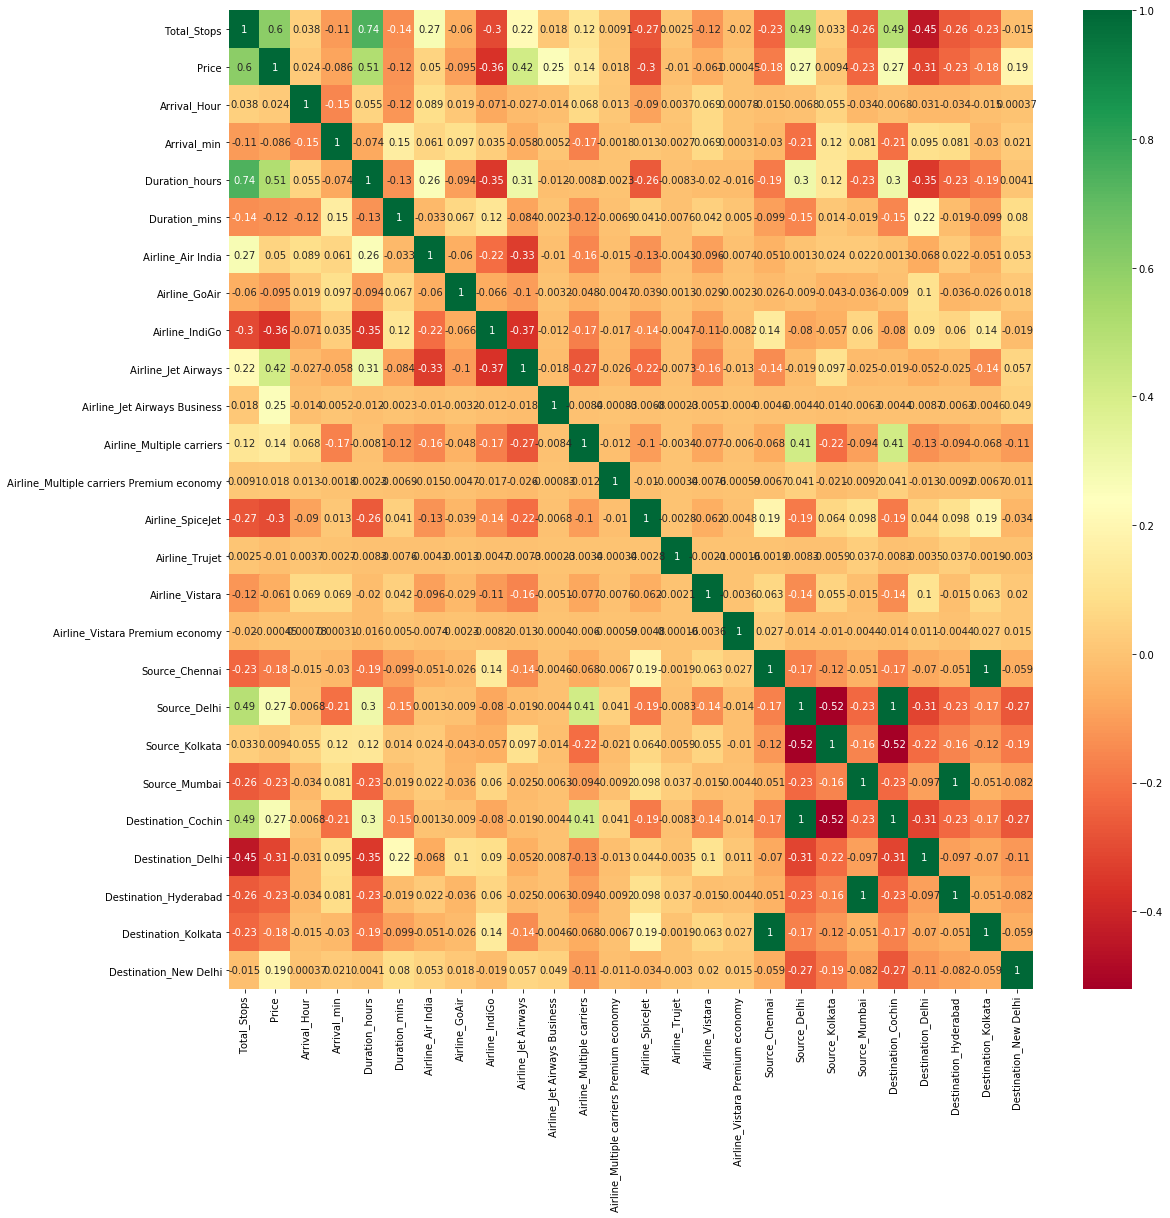

In [72]:
plt.figure(figsize=(18,18))
sns.heatmap(df_final.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [74]:
print(selection.feature_importances_)

[2.25136051e-01 1.43541914e-01 5.32939872e-02 2.46681047e-02
 2.11511955e-02 2.73858742e-02 1.95944339e-02 1.19284478e-01
 1.79307789e-02 1.01739761e-02 1.71964283e-03 1.84073088e-02
 1.42119015e-01 6.73343869e-02 1.84138958e-02 8.31598159e-04
 2.89521465e-03 1.00034789e-04 4.84628197e-03 8.30487231e-05
 4.26513316e-04 1.04802915e-02 3.43446332e-03 5.52659333e-03
 1.11178903e-02 1.64941406e-02 8.29024966e-03 4.74924463e-04
 2.48437111e-02]


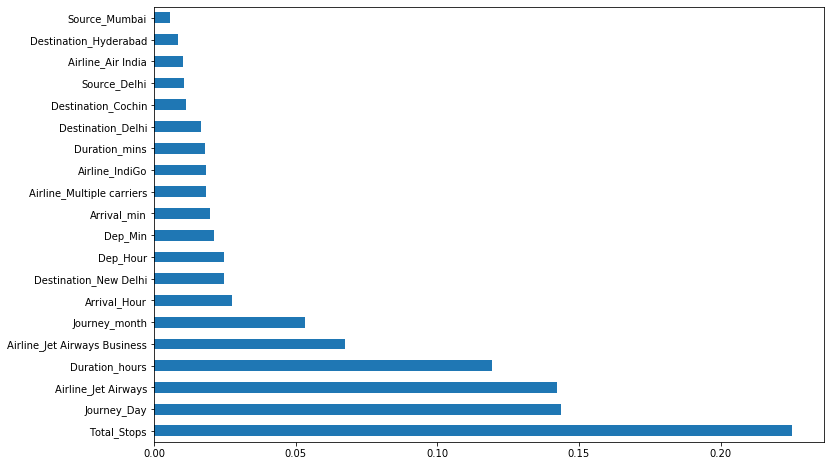

In [75]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Model Building random forest

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [79]:
y_pred=reg_rf.predict(X_test)

In [80]:
reg_rf.score(X_train,y_train)

0.9525183239240531

In [81]:
reg_rf.score(X_test,y_test)

0.7968377000255376

# Randomized Search CV to increase validation accuracy

In [82]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features=['auto','sqrt']

max_depth=[int(x) for x in np.linspace(5,30,num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [83]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
rf_random1=RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error',n_iter=10, cv=4,random_state=42,n_jobs=1)

In [86]:
rf_random1.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [87]:
rf_random1.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [88]:
prediction=rf_random1.predict(X_test)

In [89]:
from sklearn import metrics

In [90]:
print(metrics.r2_score(y_test,prediction))

0.8124516574587175


In [91]:
test_data_final.head()

,Total_Stops,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,06,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,05,06,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,05,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,05,08,00,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,06,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [92]:
test_data_final['Airline_Trujet']=0

In [93]:
test_data_final.shape

(2671, 29)

In [94]:
test_price_predictions=rf_random1.predict(test_data_final)

In [95]:
test_price_predictions

array([14672.57154852,  4624.8801429 , 16502.02382222, ...,
       17717.47636275, 13405.45291851,  7831.66438263])

In [96]:
df_new_price=pd.DataFrame({'Price':test_price_predictions})

In [97]:
df_new_price.to_csv('Submission_final.csv',index=False)

In [98]:
s=pd.read_csv('Submission_final.csv')

In [99]:
s.head()

,Price
0,14672.571549
1,4624.880143
2,16502.023822
3,11244.681863
4,4072.830553


In [100]:
import bz2

In [107]:
import pickle
import _pickle as cPickle

In [108]:
sfile=bz2.BZ2File('flight_rf1.pkl','wb')

In [109]:
pickle.dump(rf_random1,sfile)

In [106]:
pip install cPickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle


In [110]:
f=bz2.BZ2File('flight_rf1.pkl','rb')
myobj=cPickle.load(f)